In [50]:
import pandas as pd
import numpy as np
import joblib
import time
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
df=pd.read_csv('../data/credit.csv')
df.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13   other_payment_plans    1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [53]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', ' other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       ' foreign_worker', 'class'],
      dtype='object')

In [54]:
# Clean up column names
df.columns=df.columns.str.strip()
df.columns


Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [55]:
df.describe(include='all')


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,...,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,...,4,NaN,3,3,NaN,4,NaN,2,2,2
top,no checking,NaN,existing paid,radio/tv,NaN,<100,1<=X<4,NaN,male single,none,...,car,NaN,none,own,NaN,skilled,NaN,none,yes,good
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,...,332,NaN,814,713,NaN,630,NaN,596,963,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,...,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,...,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,...,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,...,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,...,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,NaN


In [56]:
df.isnull().sum()


checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [57]:
df.nunique()


checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
class                       2
dtype: int64

In [58]:
num= df.select_dtypes(include=np.number)
num.columns


Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')

In [59]:
for i in num:
    print(i)
    print(stats.describe(df[i]))
    print(stats.shapiro(df[i]))


duration
DescribeResult(nobs=1000, minmax=(4, 72), mean=20.903, variance=145.41500600600605, skewness=1.0925422109540106, kurtosis=0.9091948811374047)
ShapiroResult(statistic=0.8997879376569183, pvalue=4.906432642671475e-25)
credit_amount
DescribeResult(nobs=1000, minmax=(250, 18424), mean=3271.258, variance=7967843.470906908, skewness=1.946702018941924, kurtosis=4.265163377213492)
ShapiroResult(statistic=0.7933961638083256, pvalue=8.608545621331088e-34)
installment_commitment
DescribeResult(nobs=1000, minmax=(1, 4), mean=2.973, variance=1.2515225225225228, skewness=-0.5305507598158565, kurtosis=-1.2104232256102134)
ShapiroResult(statistic=0.788585975803092, pvalue=4.302188307273359e-34)
residence_since
DescribeResult(nobs=1000, minmax=(1, 4), mean=2.845, variance=1.2181931931931933, skewness=-0.27216078883719325, kurtosis=-1.3805449294715695)
ShapiroResult(statistic=0.8135559678420977, pvalue=1.8268542561620932e-32)
age
DescribeResult(nobs=1000, minmax=(19, 75), mean=35.546, variance=

In [60]:
cat= df.astype('category')
cat.columns


Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

<Axes: >

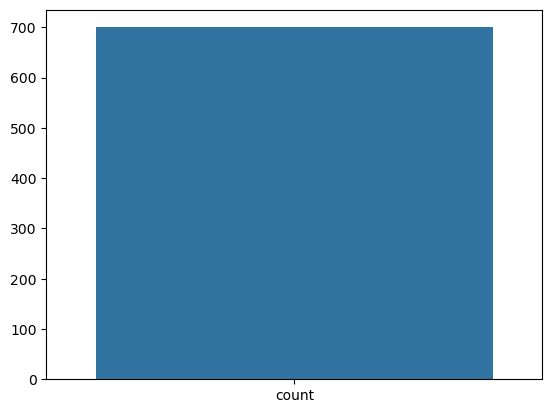

In [61]:
bad_class=df[df["class"]== 'bad']["class"].value_counts()
good_class=df[df["class"]== 'good']["class"].value_counts()
data=[bad_class, good_class]
sns.barplot(data=data)


In [62]:
df_good = df.loc[df["class"] == 'good']['age'].values.tolist()
df_bad = df.loc[df["class"] == 'bad']['age'].values.tolist()
df_age = df['age'].values.tolist()


<Axes: ylabel='Count'>

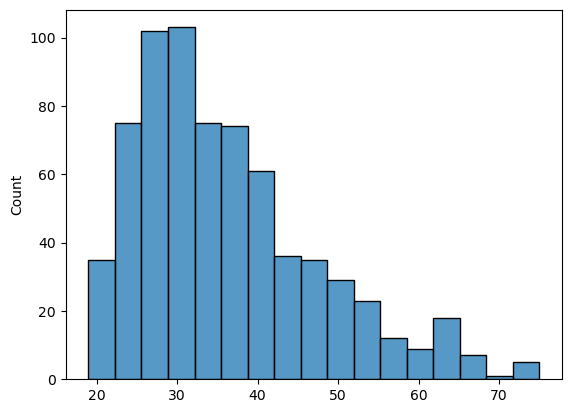

In [63]:
sns.histplot(df_good)


<Axes: ylabel='Count'>

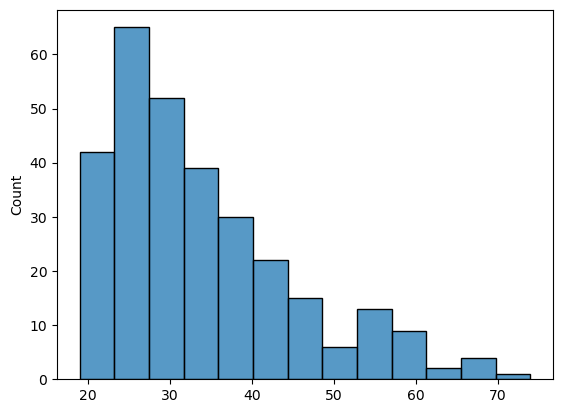

In [64]:
sns.histplot(df_bad)


<Axes: ylabel='Count'>

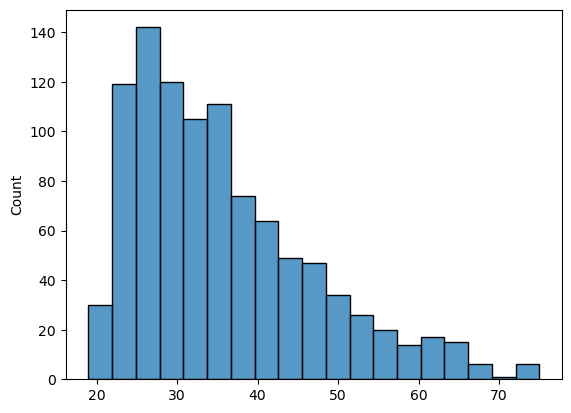

In [65]:
sns.histplot(df_age)


<Axes: >

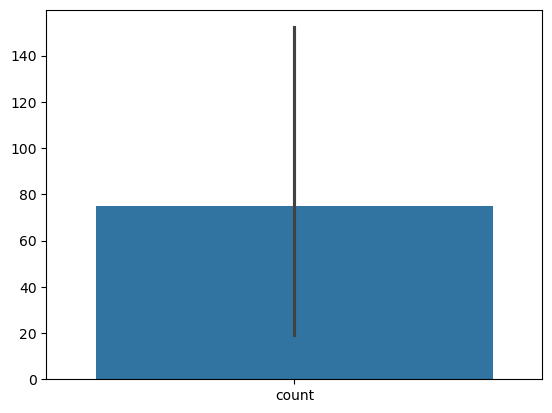

In [66]:
job_good = df[df["class"]== 'good']["job"].value_counts()
job_bad = df[df["class"]== 'bad']["job"].value_counts()
job_df=[job_good, job_bad]
sns.barplot(data=job_df)


In [72]:
df['class'].value_counts()

class
good    700
bad     300
Name: count, dtype: int64

In [73]:
df.purpose.unique()


array(['radio/tv', 'education', 'furniture/equipment', 'new car',
       'used car', 'business', 'domestic appliance', 'repairs', 'other',
       'retraining'], dtype=object)

In [74]:
#sns.pairplot(df,hue='class')


In [75]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat:
    df[i] = le.fit_transform(df[i])

df.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,2,1,6,142,4,3,3,3,2,...,3,48,1,1,1,1,0,1,1,1
1,0,29,3,6,770,2,0,1,0,2,...,3,3,1,1,0,1,0,0,1,0
2,3,8,1,2,390,2,1,1,3,2,...,3,30,1,1,0,3,1,0,1,1
3,1,26,3,3,848,2,1,1,3,1,...,1,26,1,0,0,1,1,0,1,1
4,1,17,2,4,734,2,0,2,3,2,...,2,34,1,0,1,1,1,0,1,0


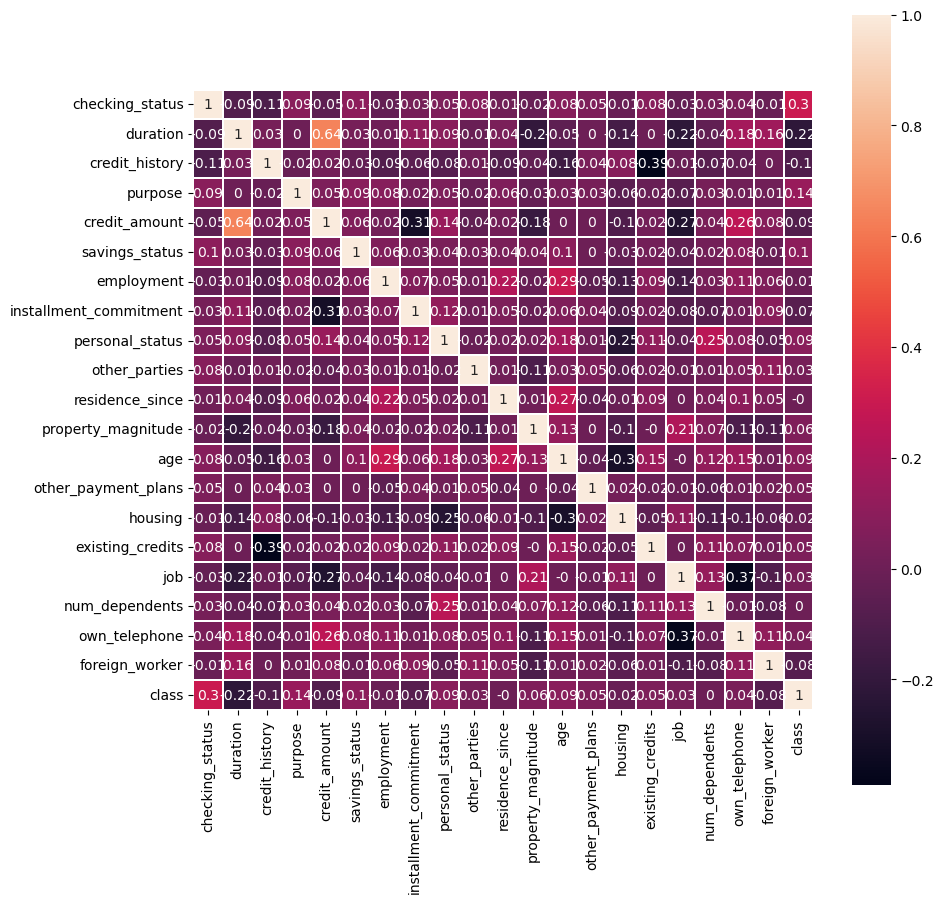

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df.corr(), 2),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()


In [77]:
# Select features and target variable
x = df[df.columns.difference(['class'])]
y = df['class']

In [78]:
# initial modeling
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
Xscale  = scaler.fit_transform(x)
Xscale
#test_scaled = scaler.transform(X_test)

array([[ 2.78850999, -0.4645937 , -1.15669474, ...,  0.62648137,
         1.04698668,  1.66990103],
       [-1.19773321, -1.26286467,  1.21764107, ...,  0.62648137,
        -0.76597727, -0.13053135],
       [ 1.19401271,  1.13194823, -0.21905894, ..., -1.02650377,
         0.14050471, -0.13053135],
       ...,
       [ 0.21959771,  1.13194823, -1.43269237, ...,  0.62648137,
         1.04698668, -0.13053135],
       [-1.10915003, -0.4645937 , -0.43834473, ...,  0.62648137,
         1.04698668, -0.13053135],
       [-0.7548173 , -1.26286467,  0.99457449, ...,  1.86622023,
         1.04698668, -1.93096373]])

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xscale, y, test_size = 0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 20), (200, 20), (800,), (200,))

In [82]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_res, y_res = smt.fit_resample(X_train, y_train)
print(f'after train split: ,{X_res.shape, y_res.shape}')

X_res, y_res = smt.fit_resample(Xscale, y)
print(f'before train split after scale: ,{X_res.shape, y_res.shape}')

after train split: ,((1118, 20), (1118,))
before train split after scale: ,((1400, 20), (1400,))


In [112]:
# Preprocessing, modelling and evaluating
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report, f1_score,precision_score,recall_score, roc_auc_score
from sklearn.metrics import make_scorer, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict 
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb

In [113]:
lr = LinearRegression().fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("LinearRegression:")
print(f'training accuracy:{lr.score(X_train,y_train)}')
print(f'Testing accuracy:{lr.score(X_test,y_test)}')


LinearRegression:
training accuracy:0.1694885678721988
Testing accuracy:0.14974766254632732


In [114]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [115]:
# !pip install lightgbm

In [116]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "LogisticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC(gamma='auto'),
    # "AdaBoost Classifier": AdaBoostClassifier(),
    "Lightgbm Classifier": lgb.LGBMClassifier()

}

In [117]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [118]:
# Pass raw scale data
model_report =evaluate_models(X=Xscale, y=y, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7750
- F1 score: 0.8525
- Precision: 0.7927
- Recall: 0.9220
- Roc Auc Score: 0.6729


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7050
- F1 score: 0.7915
- Precision: 0.7887
- Recall: 0.7943
- Roc Auc Score: 0.6429


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9087
- F1 score: 0.9376
- Precision: 0.8984
- Recall: 0.9803
- Roc Auc Score: 0.8615
----------------------------------
Model performance for Test set
- Accuracy: 0.7650
- F1 score: 0.8418
- Precision: 0.8013
- Recall: 0.8865
- Roc Auc Score: 0.6806


K-Neighbors Classifier
Model performance for Traini

In [119]:
# Result models
model_report

,Model Name,Accuracy
4,XGBClassifier,0.800
7,Lightgbm Classifier,0.800
0,Random Forest,0.775
6,Support Vector Classifier,0.770
2,Gradient Boosting,0.765
5,LogisticRegression,0.740
3,K-Neighbors Classifier,0.735
1,Decision Tree,0.705


In [120]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth': range(2, 10, 2),
    'min_child_weight':range (1, 10, 2)

}
lgbm_params={
    'n_estimators': range(1,10,100),
    'learning_rate': [0.5,1],
    'max_bin': [255]
}

In [123]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("LGBM", lgb.LGBMClassifier(), lgbm_params)
]

In [124]:
# Hypertunning Random_search and Grid_Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

kf = KFold(n_splits=30)

model_param = {}
for name, model, params in randomcv_models:
    print(name, model, params)
    random = RandomizedSearchCV(estimator=model,
                                    param_distributions=params,
                                   n_iter=100,
                                   cv=kf,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

XGBoost XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) {'max_depth': range(2, 10, 2), 'min_child_weight': range(1, 10, 2)}
Fitting 30 folds for each of 20 candidates, totalling 600 fits


C:\Users\sudwa\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LGBM LGBMClassifier() {'n_estimators': range(1, 10, 100), 'learning_rate': [0.5, 1], 'max_bin': [255]}
Fitting 30 folds for each of 2 candidates, totalling 60 fits


C:\Users\sudwa\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=100. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Info] Number of positive: 559, number of negative: 241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698750 -> initscore=0.841353
[LightGBM] [Info] Start training from score 0.841353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 3, 'max_depth': 2}
---------------- Best Params for LGBM -------------------
{'n_estimators': 1, 'max_bin': 255, 'learning_rate': 1}


In [125]:
model_param

{'XGBoost': {'min_child_weight': 3, 'max_depth': 2},
 'LGBM': {'n_estimators': 1, 'max_bin': 255, 'learning_rate': 1}}

In [127]:
# Testing with different dataset
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
    "LGBMClassifier": lgb.LGBMClassifier(**model_param['LGBM'])
}
tuned_report =evaluate_models(X=Xscale, y=y, models=best_models)

XGBClassifier
Model performance for Training set
- Accuracy: 0.8788
- F1 score: 0.9169
- Precision: 0.8799
- Recall: 0.9571
- Roc Auc Score: 0.8271
----------------------------------
Model performance for Test set
- Accuracy: 0.7850
- F1 score: 0.8552
- Precision: 0.8141
- Recall: 0.9007
- Roc Auc Score: 0.7046


[LightGBM] [Info] Number of positive: 559, number of negative: 241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698750 -> initscore=0.841353
[LightGBM] [Info] Start training from score 0.841353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LGBMClassifier
Model performance for Training set
- Accuracy: 0.7800
- F1 score: 0.8508
- Precision: 0.8084
- Recall: 0.8980


In [128]:
tuned_report

,Model Name,Accuracy
0,XGBClassifier,0.785
1,LGBMClassifier,0.780


In [129]:
params = {'min_child_weight': 4, 'max_depth': 6}

best_model = XGBClassifier(**params)
# best_model = XGBClassifier(**model_param['XGBoost'])
best_model = best_model.fit(X_train,y_train)
y_pred_best = best_model.predict(X_test)
test_score = accuracy_score(y_test,y_pred_best)
cr = classification_report(y_test,y_pred_best)

print("FINAL MODEL 'XGBoost'")
print(f'Training Accuracy: {best_model.score(X_train,y_train)}')
print("Testing Accuracy Score: {:.4f}".format(test_score))
print (cr)


FINAL MODEL 'XGBoost'
Training Accuracy: 0.99875
Testing Accuracy Score: 0.8000
              precision    recall  f1-score   support

           0       0.71      0.54      0.62        59
           1       0.83      0.91      0.86       141

    accuracy                           0.80       200
   macro avg       0.77      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200



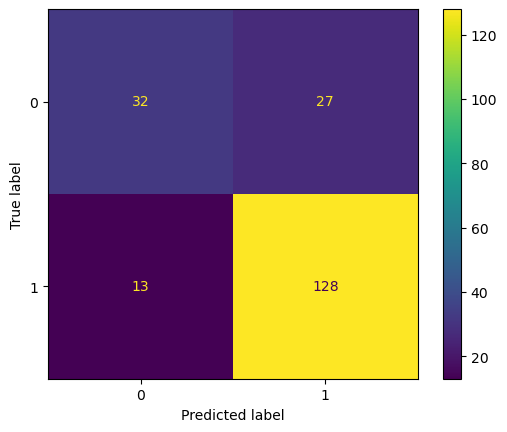

In [130]:
# ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

<Axes: >

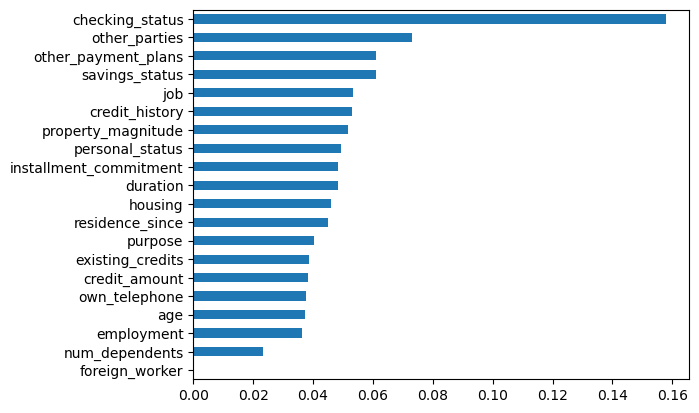

In [131]:
from matplotlib.pyplot import figure
feat_importances = pd.Series(best_model.feature_importances_, index = x.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')

In [132]:
# Save best xgboost model
import joblib
import os
best_xgb_model = best_model

print(f"Best model: {best_xgb_model}")
joblib.dump(best_xgb_model, 'xgb.pkl')

Best model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


['xgb.pkl']

In [133]:
model = open('xgb.pkl','rb')
xgb = joblib.load(model)

In [134]:
y.iloc[900]

0

In [135]:
trys=x.iloc[900].values#.reshape(1,-1)
trys

array([ 24,   1, 495,   1,  12,   3,   0,   1,   2,   1,   1,   0,   1,
         0,   1,   3,   1,   4,   3,   2], dtype=int64)

In [136]:
data=[[21,   0, 630,   1,  13,   4,   2,   1,   1,   2,   2,   1,   2,
         1,   1,   2,   0,   0,   2,   2]]

In [137]:
test1=scaler.transform(data)
test1

C:\Users\sudwa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.39676407, -1.26286467,  0.68833054, -1.14621191, -0.09549217,
         1.84200791,  2.75908382,  0.19601428, -0.13371046,  0.02414692,
         0.76743843,  2.33486893,  0.30110915,  0.21834568,  1.21459768,
         0.0903551 , -1.14510108, -1.85299635,  0.14050471, -0.13053135]])

In [138]:
xgb.predict(test1)[0]

1

In [143]:
# !pip install xgboost
!pip install hyperopt

In [158]:
from xgboost import XGBClassifier
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score, \
                            roc_curve,confusion_matrix


space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180
    }


def hyperparameter_tuning(space):
    model = xgb.XGBClassifier(n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                         reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                         colsample_bytree=int(space['colsample_bytree']))
    # evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    model.fit(X_train, y_train)
            # eval_set=evaluation, eval_metric="rmse",
            # early_stopping_rounds=10,verbose=False)

    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print ("SCORE:", accuracy)
    #change the metric if you like
    return {'loss': -accuracy, 'status': STATUS_OK, 'model': model}


trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

SCORE:                                                                                                                 
0.705                                                                                                                  
SCORE:                                                                                                                 
0.705                                                                                                                  
SCORE:                                                                                                                 
0.705                                                                                                                  
SCORE:                                                                                                                 
0.705                                                                                                                  
SCORE:                                  

In [159]:
print(best)

{'colsample_bytree': 0.9367123591160272, 'gamma': 6.205863888869391, 'max_depth': 17.0, 'min_child_weight': 3.0, 'reg_alpha': 179.0, 'reg_lambda': 0.28484343697689984}


In [ ]:
# Building pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


num_features = df.select_dtypes(include=['int64']).columns
cat_features = df.select_dtypes(include=['object']).columns


num_transformer = Pipeline([('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),('encoder',LabelEncoder())])

preprocessor = ColumnTransformer([
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

pipe_rf = Pipeline([('preprocess',preprocessor),
 ('clf', model())])